<a href="https://colab.research.google.com/github/Ragnarok540/music/blob/main/src/granular_synthesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# https://www.youtube.com/watch?v=Vm4Oz0BBB4w

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import random

In [2]:
def sinusoid(frequency, duration, frame_rate=44100):
  num_samples = frame_rate * duration
  time = np.linspace(0, duration, num_samples)
  angular_frequency = 2 * np.pi * frequency
  signal = np.sin(angular_frequency * time)
  return signal

signal_440 = sinusoid(440, 2)

Audio(signal_440, rate=44100)

In [21]:
def granular_synthesis(input_signal: np.ndarray,
                       sample_rate: int,
                       grain_size: float,
                       density: int,
                       jitter: float,
                       stretch_factor: float = 1) -> np.ndarray:
    samples_per_grain = int(grain_size * sample_rate)
    grain_spacing = max(int(sample_rate / density), 1)
    output_length = int(len(input_signal) * stretch_factor)
    output = np.zeros(output_length)
    window = np.hanning(samples_per_grain)
    grains_total = int((len(input_signal) - samples_per_grain) / grain_spacing)
    position = 0

    for i in range(grains_total):
        random_offset = int(random.uniform(-jitter, jitter) * grain_spacing)
        grain_start = position + random_offset
        grain_start = np.clip(grain_start, 0, len(input_signal) - samples_per_grain)
        grain = input_signal[grain_start:grain_start + samples_per_grain]
        grain = grain * window
        output_position = int(position * stretch_factor)

        if output_position + samples_per_grain > output_length:
            grain = grain[:output_length - output_position]

        output[output_position:output_position + len(grain)] += grain
        position += grain_spacing

    peak = np.max(np.abs(output))
    output = (output / peak) * 0.8
    return output

granular = granular_synthesis(signal_440, 44100, 0.05, 100, 50)

Audio(granular, rate=44100)

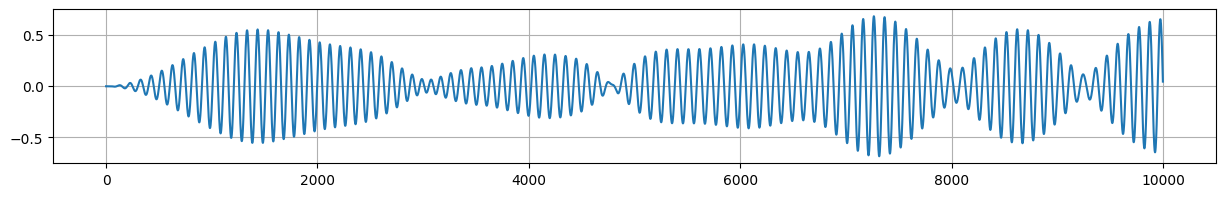

In [20]:
def plot_signal(signal, start=0, end=10000):
    plt.figure(figsize=(15, 2))
    plt.grid(True)
    plt.plot(signal[start:end])
    plt.show()

plot_signal(granular)

In [40]:
granular_2 = granular_synthesis(signal_440, 44100, 0.005, 10, 5000, 0.5)

Audio(granular_2, rate=44100)

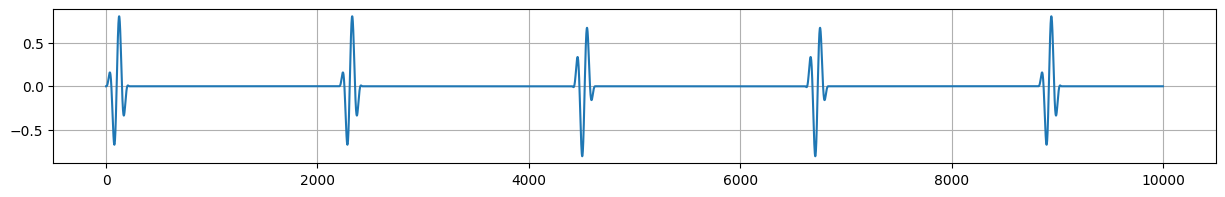

In [41]:
plot_signal(granular_2)